In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "toscana"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,9,Toscana,2,0,2,0,2,2,2,...,0.0,156.0,0.0,0.0,0.00,100.00,1.28,0.00,0.00,0.000
1,2020-02-26T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,67.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,47.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,9,Toscana,5,0,5,2,7,5,6,...,0.0,27.0,0.0,2.0,0.00,71.43,22.22,0.00,0.00,300.000
4,2020-02-29T17:00:00,9,Toscana,7,0,7,3,10,3,3,...,0.0,94.0,0.0,1.0,0.00,70.00,3.19,0.00,0.00,42.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-11-21T17:00:00,9,Toscana,1798,296,2094,51046,53140,-729,1892,...,44.0,18527.0,7766.0,-736.0,14.14,3.94,10.21,24.36,0.34,3.512
271,2020-11-22T17:00:00,9,Toscana,1785,298,2083,50641,52724,-416,1929,...,51.0,17481.0,7590.0,-405.0,14.31,3.95,11.03,25.42,0.68,3.630
272,2020-11-23T17:00:00,9,Toscana,1832,296,2128,50291,52419,-305,1323,...,48.0,10551.0,4531.0,-350.0,13.91,4.06,12.54,29.20,-0.67,2.509
273,2020-11-24T17:00:00,9,Toscana,1771,296,2067,48639,50706,-1713,962,...,47.0,11813.0,5086.0,-1652.0,14.32,4.08,8.14,18.91,0.00,1.835


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 25, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 986
Nuovi tamponi: 14843.0
Percentuale nuovi positivi/nuovi tamponi: 6.6000000000000005 %
Nuovi guariti: 2345.0
Nuovi deceduti: 67.0
Variazione positivi ricoverati con sintomi: -17.0
Variazione positivi in terapia intensiva: -10.0
Variazione positivi in isolamento dimiciliare: -1399.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 25, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-26T17:00:00,9,Toscana,84,24,108,3219,3327,66,110,...,1.0,6953.0,4391.0,69.0,22.22,3.25,1.58,2.51,0.00,3.373
1,2020-09-27T17:00:00,9,Toscana,82,23,105,3302,3407,80,101,...,0.0,7541.0,5121.0,83.0,21.90,3.08,1.34,1.97,-4.17,3.036
2,2020-09-28T17:00:00,9,Toscana,93,22,115,3278,3393,-14,85,...,3.0,4396.0,2860.0,-24.0,19.13,3.39,1.93,2.97,-4.35,2.495
3,2020-09-29T17:00:00,9,Toscana,97,20,117,3251,3368,-25,56,...,4.0,4731.0,3009.0,-27.0,17.09,3.47,1.18,1.86,-9.09,1.650
4,2020-09-30T17:00:00,9,Toscana,97,22,119,3283,3402,34,120,...,0.0,7703.0,4906.0,32.0,18.49,3.50,1.56,2.45,10.00,3.563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-21T17:00:00,9,Toscana,1798,296,2094,51046,53140,-729,1892,...,44.0,18527.0,7766.0,-736.0,14.14,3.94,10.21,24.36,0.34,3.512
57,2020-11-22T17:00:00,9,Toscana,1785,298,2083,50641,52724,-416,1929,...,51.0,17481.0,7590.0,-405.0,14.31,3.95,11.03,25.42,0.68,3.630
58,2020-11-23T17:00:00,9,Toscana,1832,296,2128,50291,52419,-305,1323,...,48.0,10551.0,4531.0,-350.0,13.91,4.06,12.54,29.20,-0.67,2.509
59,2020-11-24T17:00:00,9,Toscana,1771,296,2067,48639,50706,-1713,962,...,47.0,11813.0,5086.0,-1652.0,14.32,4.08,8.14,18.91,0.00,1.835


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

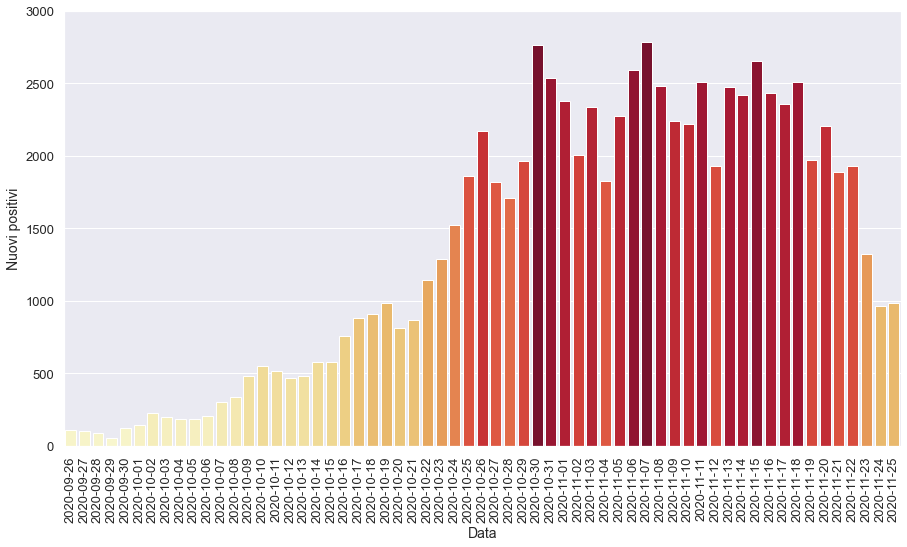

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

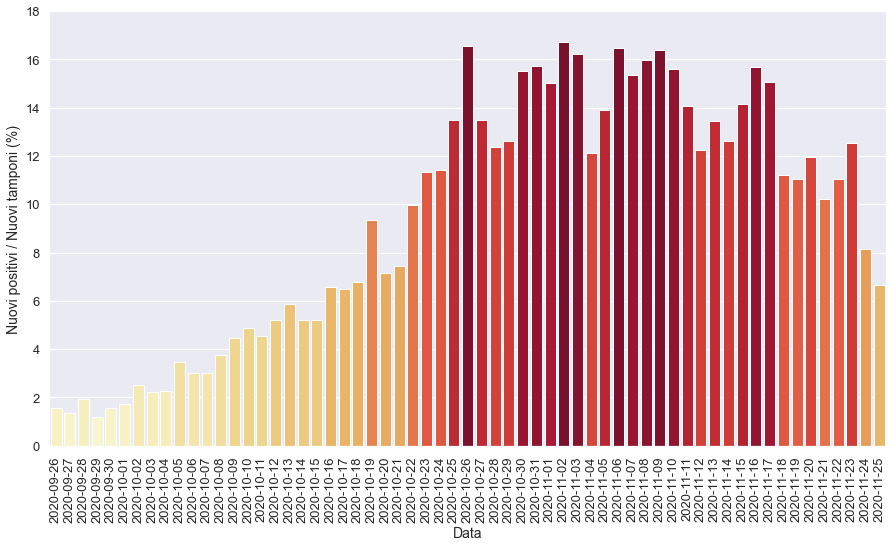

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

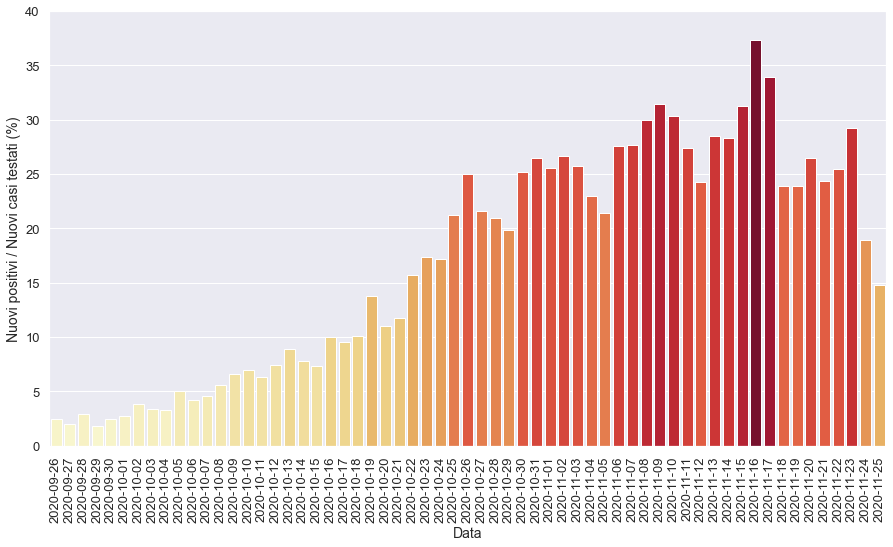

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

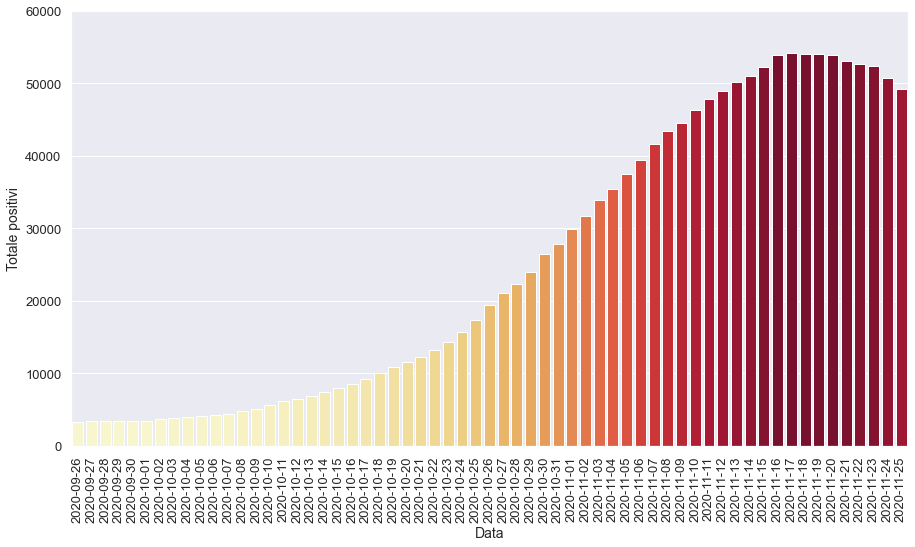

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

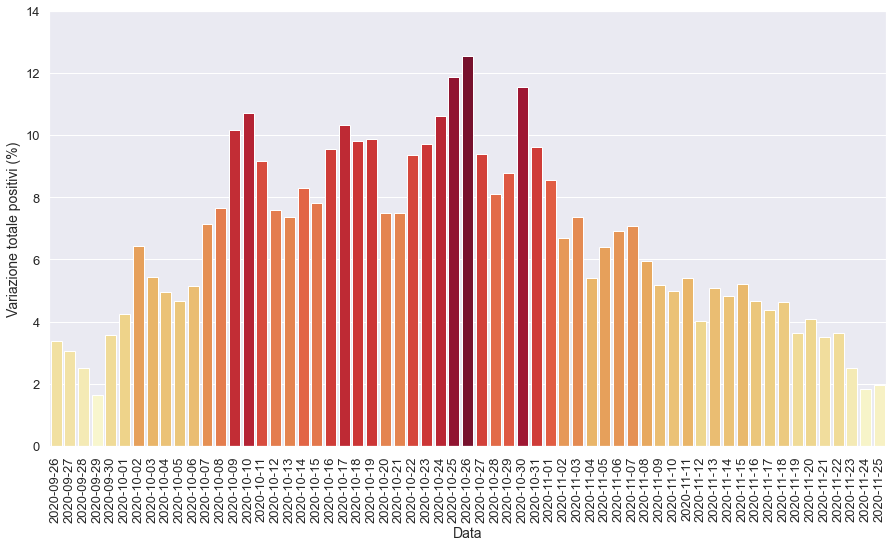

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

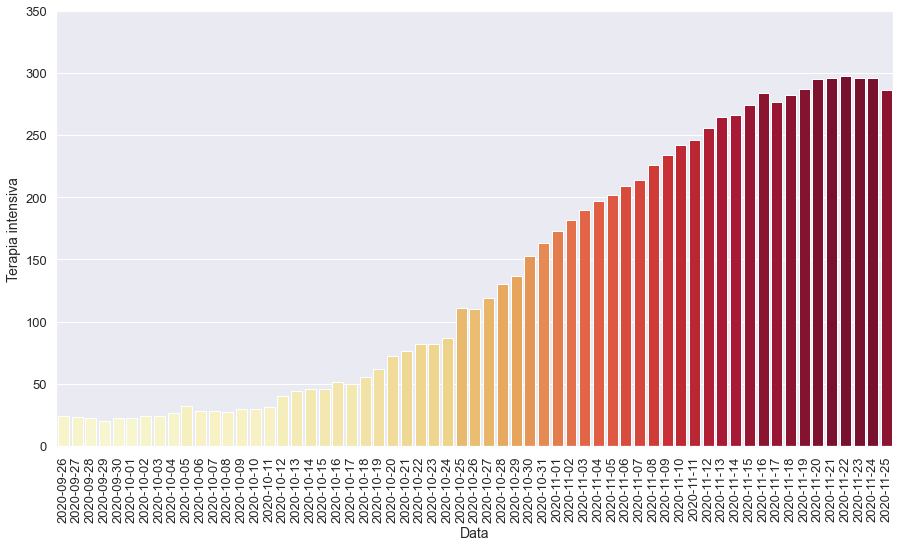

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

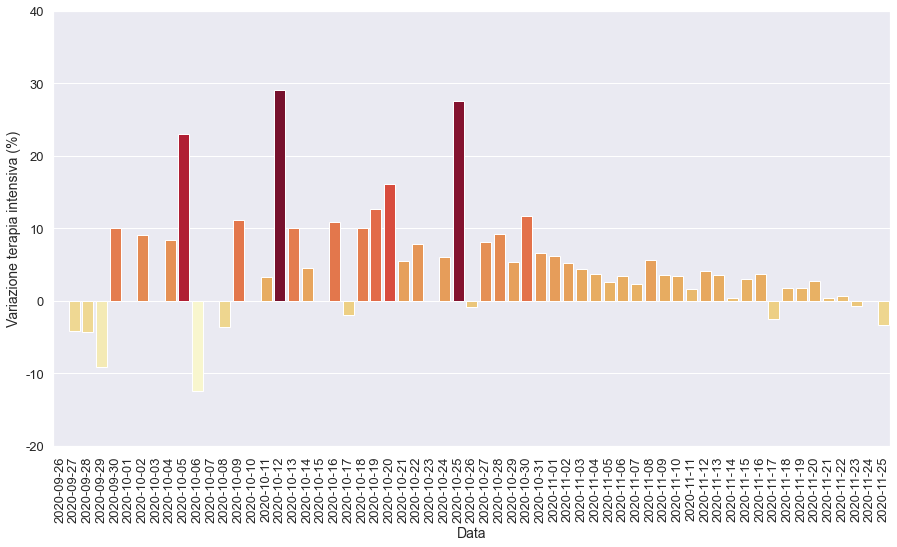

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

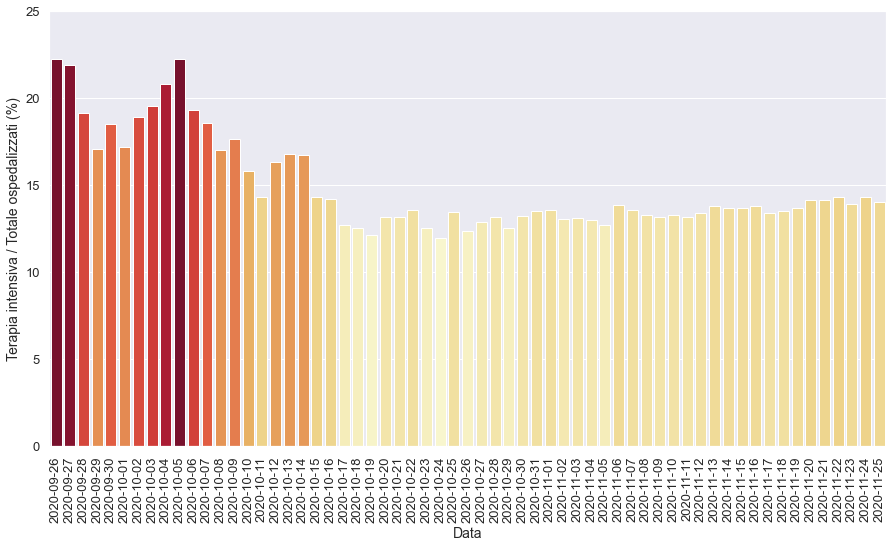

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

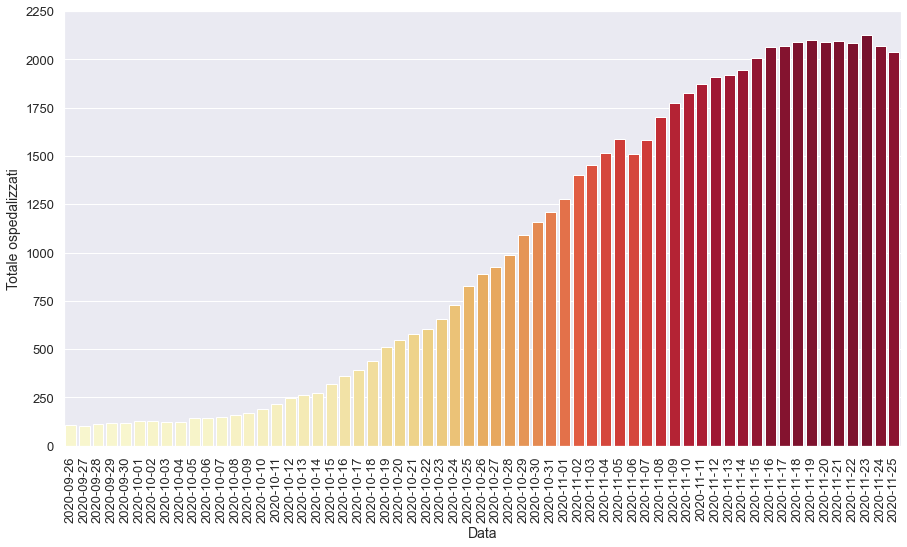

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

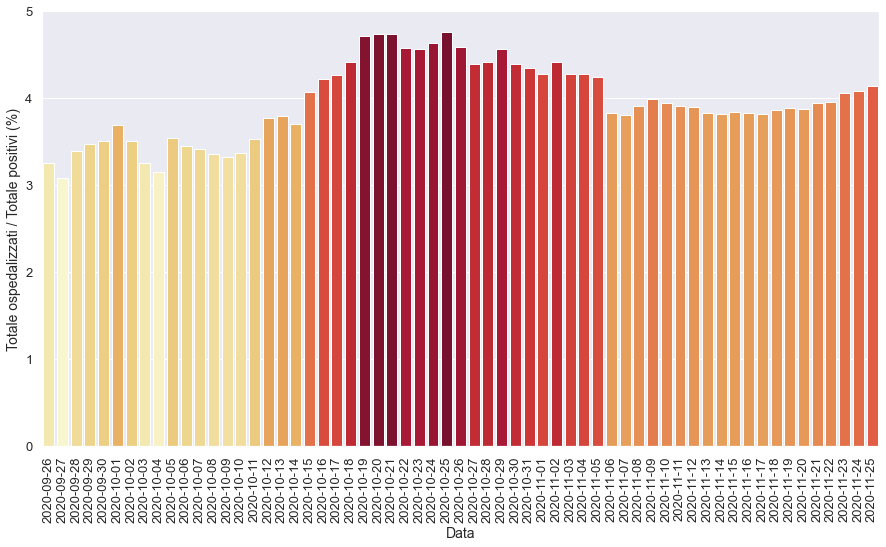

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

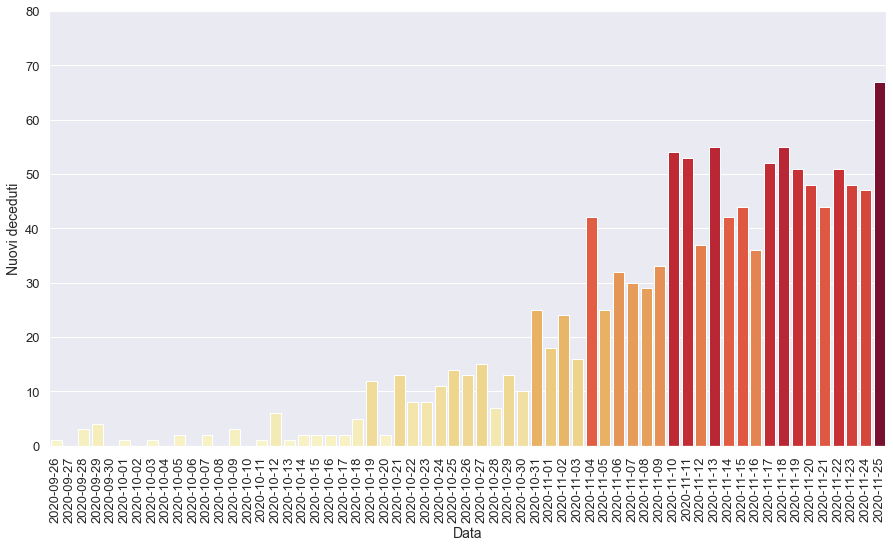

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

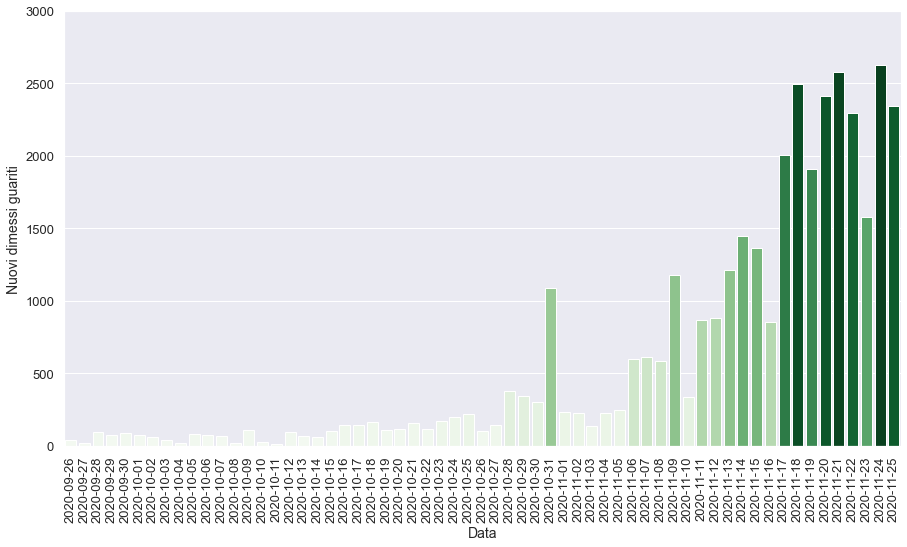

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-26T17:00:00,9,Toscana,779,110,889,18487,19376,2056,2171,...,13.0,13122.0,8672.0,1992.0,12.37,4.59,16.54,25.03,-0.90,12.535
1,2020-10-27T17:00:00,9,Toscana,804,119,923,20117,21040,1664,1823,...,15.0,13502.0,8439.0,1630.0,12.89,4.39,13.50,21.60,8.18,9.409
2,2020-10-28T17:00:00,9,Toscana,857,130,987,21373,22360,1320,1708,...,7.0,13811.0,8156.0,1256.0,13.17,4.41,12.37,20.94,9.24,8.118
3,2020-10-29T17:00:00,9,Toscana,956,137,1093,22877,23970,1610,1966,...,13.0,15594.0,9904.0,1504.0,12.53,4.56,12.61,19.85,5.38,8.792
4,2020-10-30T17:00:00,9,Toscana,1007,153,1160,25260,26420,2450,2765,...,10.0,17834.0,10964.0,2383.0,13.19,4.39,15.50,25.22,11.68,11.535
5,2020-10-31T17:00:00,9,Toscana,1046,163,1209,26635,27844,1424,2540,...,25.0,16176.0,9589.0,1375.0,13.48,4.34,15.70,26.49,6.54,9.614
6,2020-11-01T17:00:00,9,Toscana,1106,173,1279,28695,29974,2130,2379,...,18.0,15841.0,9309.0,2060.0,13.53,4.27,15.02,25.56,6.13,8.544
7,2020-11-02T17:00:00,9,Toscana,1217,182,1399,30336,31735,1761,2009,...,24.0,12017.0,7532.0,1641.0,13.01,4.41,16.72,26.67,5.20,6.702
8,2020-11-03T17:00:00,9,Toscana,1261,190,1451,32466,33917,2182,2336,...,16.0,14415.0,9081.0,2130.0,13.09,4.28,16.21,25.72,4.40,7.361
9,2020-11-04T17:00:00,9,Toscana,1319,197,1516,33948,35464,1547,1828,...,42.0,15086.0,7953.0,1482.0,12.99,4.27,12.12,22.99,3.68,5.392


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

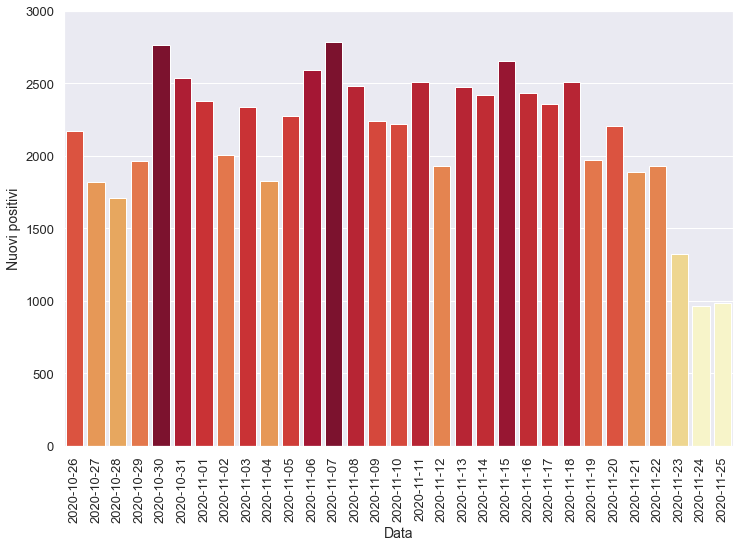

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

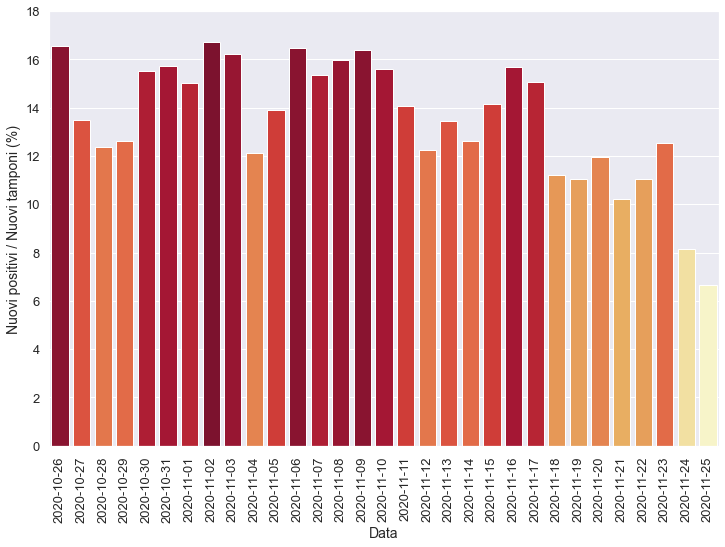

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

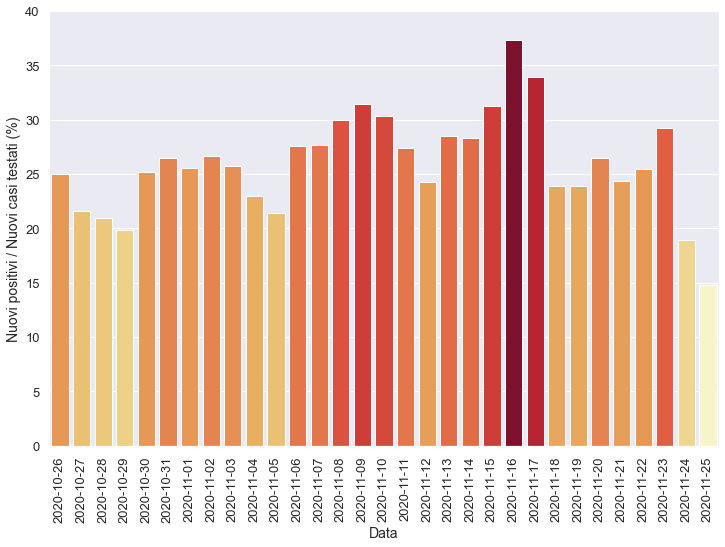

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

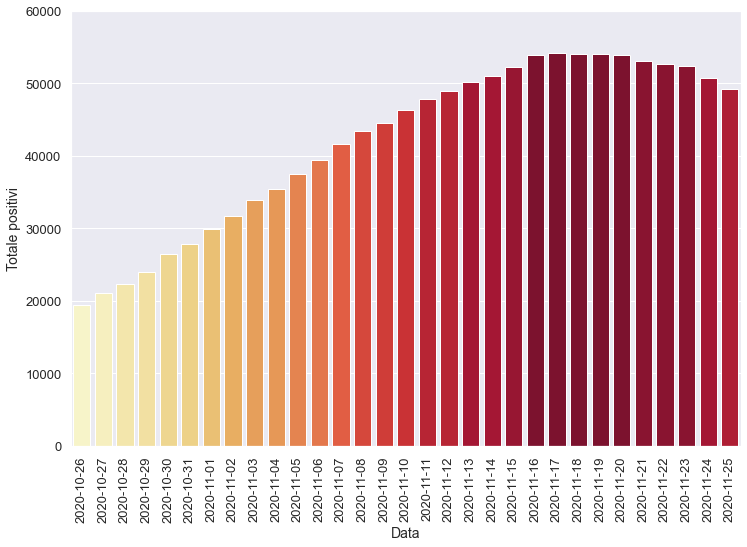

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

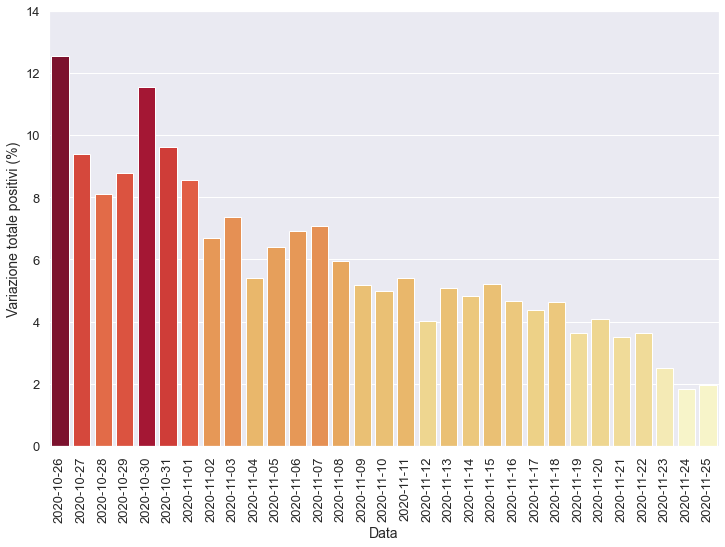

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

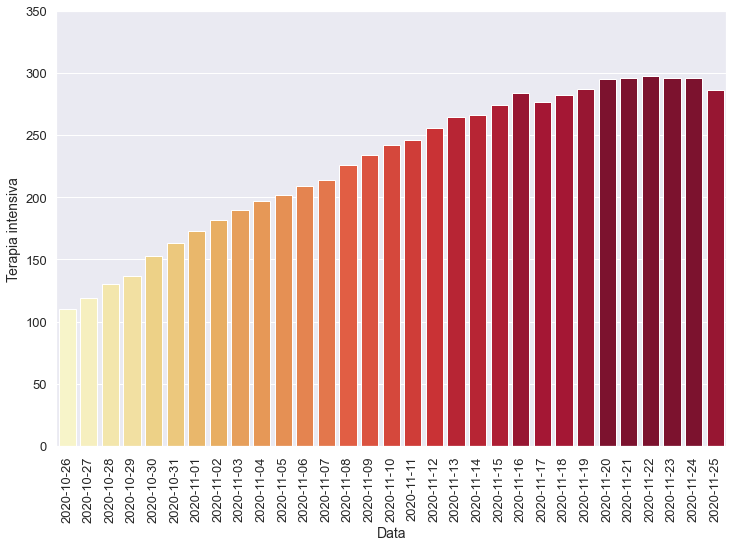

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

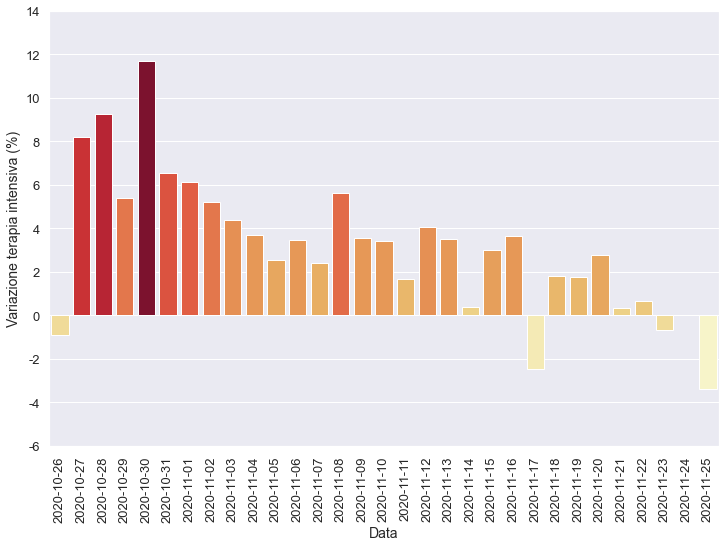

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

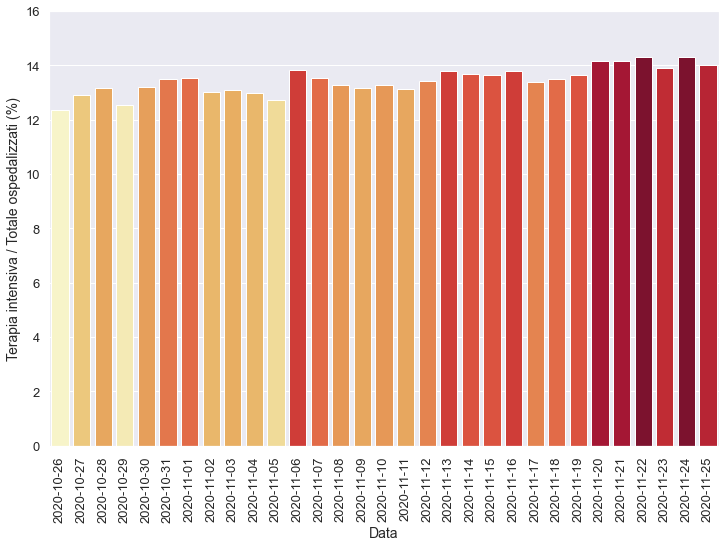

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

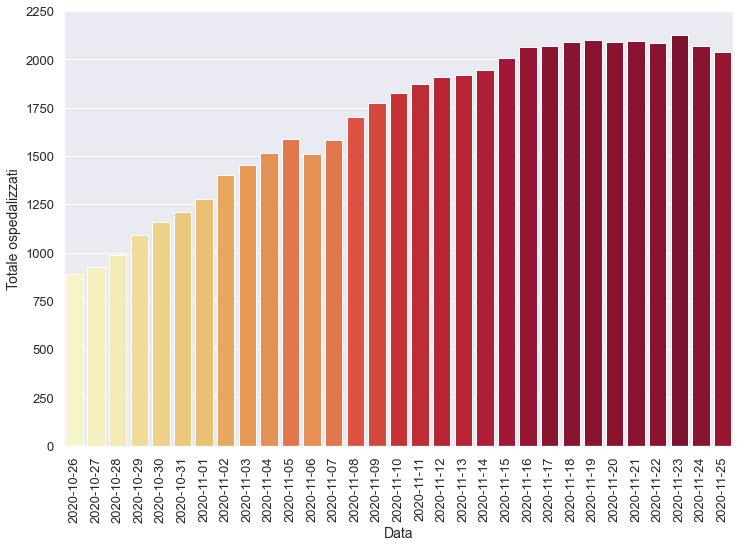

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

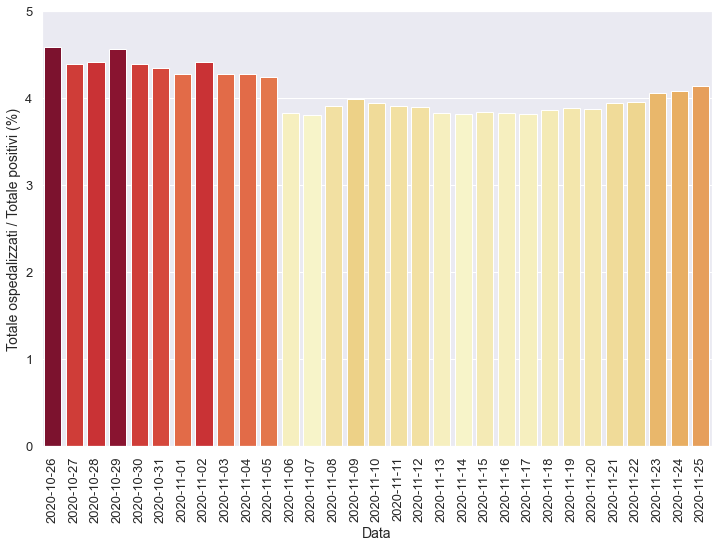

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

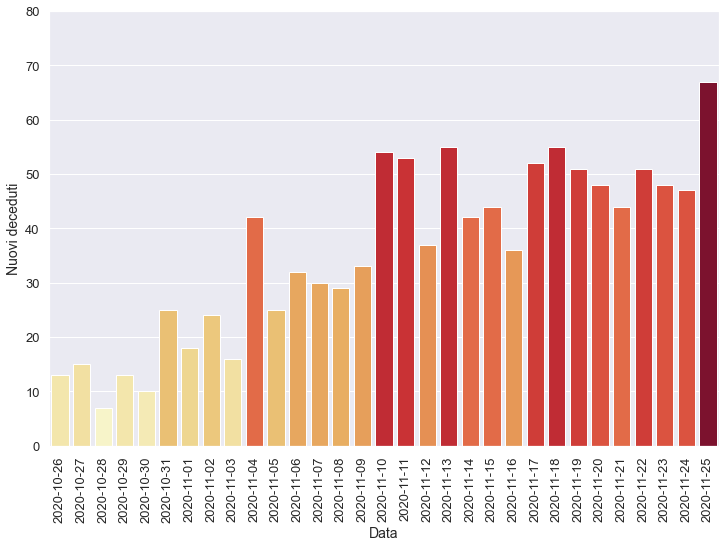

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

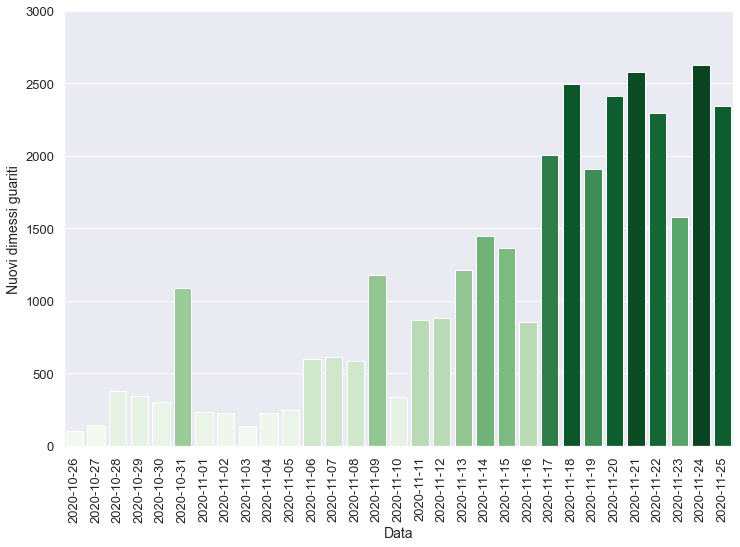

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-18T17:00:00,9,Toscana,1805,282,2087,52023,54110,-42,2508,...,55.0,22365.0,10475.0,-60.0,13.51,3.86,11.21,23.94,1.81,4.631
1,2020-11-19T17:00:00,9,Toscana,1814,287,2101,52023,54124,14,1972,...,51.0,17830.0,8244.0,0.0,13.66,3.88,11.06,23.92,1.77,3.644
2,2020-11-20T17:00:00,9,Toscana,1792,295,2087,51782,53869,-255,2207,...,48.0,18442.0,8340.0,-241.0,14.14,3.87,11.97,26.46,2.79,4.078
3,2020-11-21T17:00:00,9,Toscana,1798,296,2094,51046,53140,-729,1892,...,44.0,18527.0,7766.0,-736.0,14.14,3.94,10.21,24.36,0.34,3.512
4,2020-11-22T17:00:00,9,Toscana,1785,298,2083,50641,52724,-416,1929,...,51.0,17481.0,7590.0,-405.0,14.31,3.95,11.03,25.42,0.68,3.630
5,2020-11-23T17:00:00,9,Toscana,1832,296,2128,50291,52419,-305,1323,...,48.0,10551.0,4531.0,-350.0,13.91,4.06,12.54,29.20,-0.67,2.509
6,2020-11-24T17:00:00,9,Toscana,1771,296,2067,48639,50706,-1713,962,...,47.0,11813.0,5086.0,-1652.0,14.32,4.08,8.14,18.91,0.00,1.835
7,2020-11-25T17:00:00,9,Toscana,1754,286,2040,47240,49280,-1426,986,...,67.0,14843.0,6682.0,-1399.0,14.02,4.14,6.64,14.76,-3.38,1.945


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

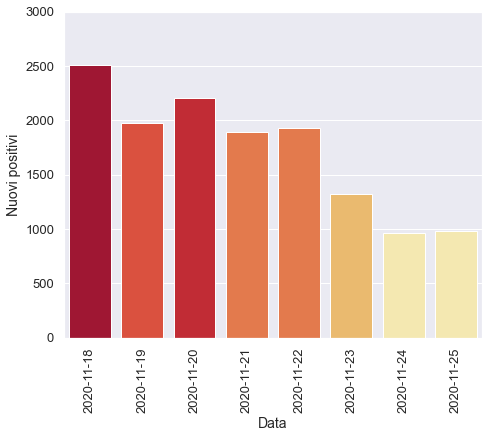

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

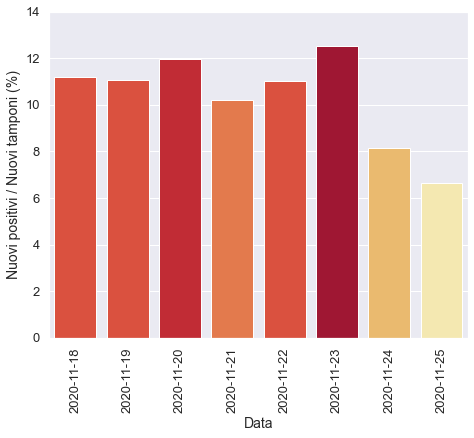

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

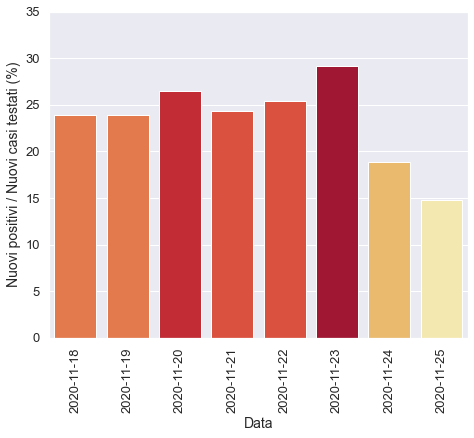

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

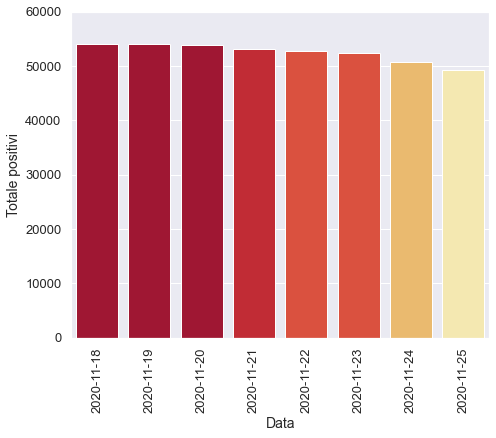

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

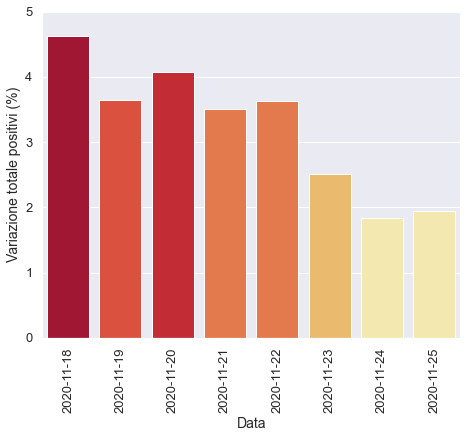

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

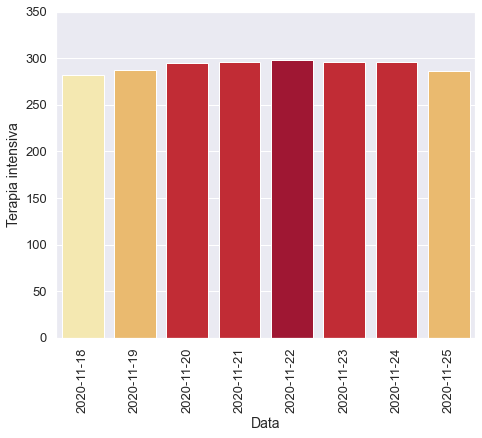

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

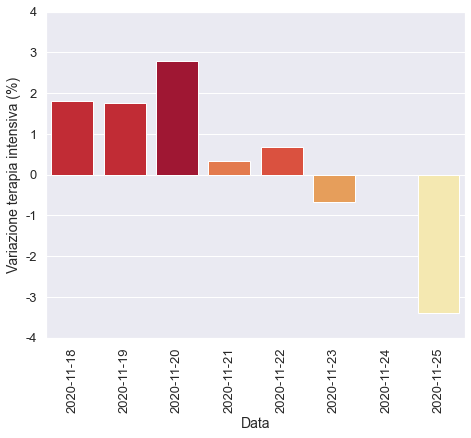

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

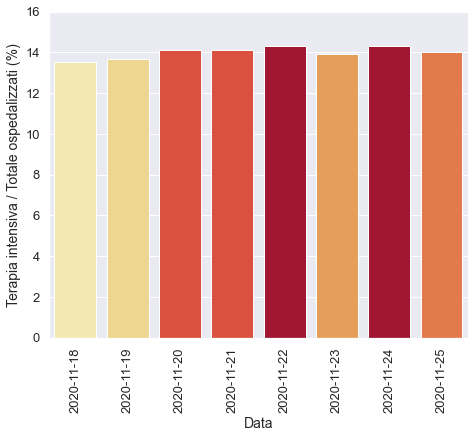

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

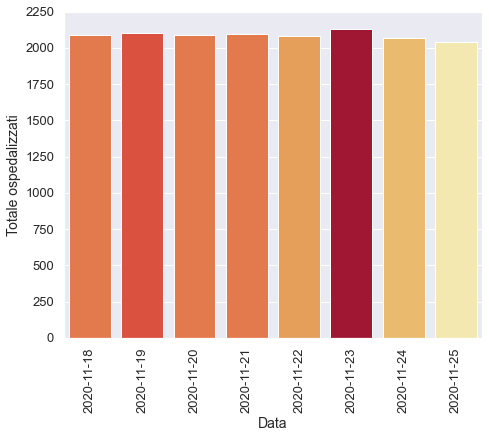

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

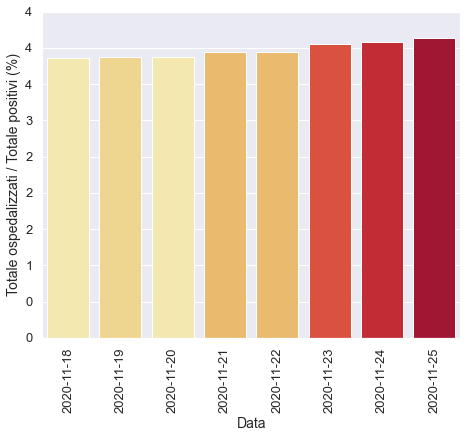

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

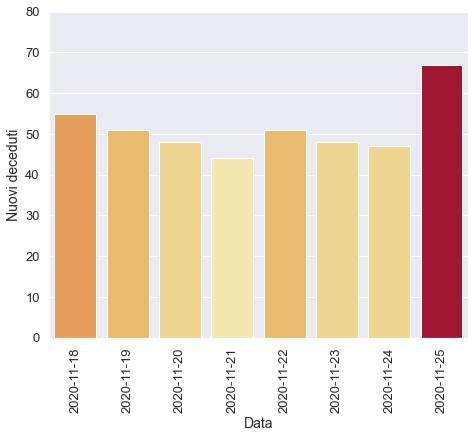

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

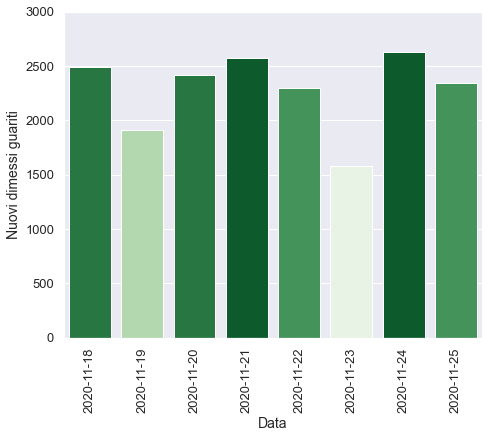

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)